In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Data.csv')

In [3]:
X=data.drop(['gnd'],axis=1)

In [4]:
y=data['gnd']

In [5]:
from sklearn.feature_selection import VarianceThreshold

In [6]:
Variance=VarianceThreshold(0.4)

In [7]:
High_variance=Variance.fit_transform(X)

In [8]:
High_variance[0:5]

array([[ 1.      ,  0.537992,  0.294486,  0.015796,  0.511609, -0.166338,
        -0.92092 ,  0.186746,  0.241829, -0.993442, -0.981236, -0.999608,
        -0.999391, -0.999959, -0.999994, -0.999997, -1.      , -0.693973,
        -0.390585, -1.      , -1.      , -0.641419,  0.336534, -0.577477,
        -0.999994, -0.999951, -0.91961 , -0.464698,  0.380516,  0.253031,
        -0.628203, -0.972094, -0.999206, -0.996188, -0.701821, -0.083196,
         0.322024, -0.506562, -0.899705, -0.967047, -0.923094, -0.582717,
        -0.14346 ,  0.405317, -0.050328, -0.430388,  0.195612,  0.505857,
         0.368924,  0.320216],
       [ 2.      ,  0.166035,  0.792276,  0.293105,  0.484311,  0.875532,
        -0.293676,  0.413152,  0.618632, -0.589942, -0.949252, -0.728933,
        -0.976592, -0.815808, -0.982435, -0.824331, -0.961688,  0.019159,
         0.126844, -0.585534, -0.70045 ,  0.047216, -0.721259,  0.070996,
         0.088509,  0.04715 ,  0.694876, -0.009094, -0.752983, -0.781604,
       

In [9]:
X.columns[Variance.get_support()] #neglected features

Index(['Unnamed: 0', 'fea.53', 'fea.54', 'fea.60', 'fea.69', 'fea.70',
       'fea.72', 'fea.76', 'fea.85', 'fea.88', 'fea.89', 'fea.104', 'fea.105',
       'fea.120', 'fea.121', 'fea.136', 'fea.137', 'fea.141', 'fea.148',
       'fea.152', 'fea.153', 'fea.157', 'fea.163', 'fea.164', 'fea.168',
       'fea.169', 'fea.172', 'fea.173', 'fea.174', 'fea.179', 'fea.180',
       'fea.181', 'fea.184', 'fea.185', 'fea.188', 'fea.189', 'fea.195',
       'fea.196', 'fea.197', 'fea.200', 'fea.201', 'fea.203', 'fea.204',
       'fea.205', 'fea.212', 'fea.213', 'fea.219', 'fea.220', 'fea.229',
       'fea.230'],
      dtype='object')

In [10]:
best_features=[i for i in X.columns if i not  in X.columns[Variance.get_support()]]

In [11]:
best_features

['fea.1',
 'fea.2',
 'fea.3',
 'fea.4',
 'fea.5',
 'fea.6',
 'fea.7',
 'fea.8',
 'fea.9',
 'fea.10',
 'fea.11',
 'fea.12',
 'fea.13',
 'fea.14',
 'fea.15',
 'fea.16',
 'fea.17',
 'fea.18',
 'fea.19',
 'fea.20',
 'fea.21',
 'fea.22',
 'fea.23',
 'fea.24',
 'fea.25',
 'fea.26',
 'fea.27',
 'fea.28',
 'fea.29',
 'fea.30',
 'fea.31',
 'fea.32',
 'fea.33',
 'fea.34',
 'fea.35',
 'fea.36',
 'fea.37',
 'fea.38',
 'fea.39',
 'fea.40',
 'fea.41',
 'fea.42',
 'fea.43',
 'fea.44',
 'fea.45',
 'fea.46',
 'fea.47',
 'fea.48',
 'fea.49',
 'fea.50',
 'fea.51',
 'fea.52',
 'fea.55',
 'fea.56',
 'fea.57',
 'fea.58',
 'fea.59',
 'fea.61',
 'fea.62',
 'fea.63',
 'fea.64',
 'fea.65',
 'fea.66',
 'fea.67',
 'fea.68',
 'fea.71',
 'fea.73',
 'fea.74',
 'fea.75',
 'fea.77',
 'fea.78',
 'fea.79',
 'fea.80',
 'fea.81',
 'fea.82',
 'fea.83',
 'fea.84',
 'fea.86',
 'fea.87',
 'fea.90',
 'fea.91',
 'fea.92',
 'fea.93',
 'fea.94',
 'fea.95',
 'fea.96',
 'fea.97',
 'fea.98',
 'fea.99',
 'fea.100',
 'fea.101',
 'fea.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
best_fit=Variance.fit_transform(X_train,y_train)

In [14]:
X_selected_features=Variance.transform(X_train)
X_test_selected=Variance.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
score_selected=LinearRegression().fit(X_selected_features,y_train).score(X_test_selected,y_test)
score_selected

0.9464020774153653

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
Rfc=RandomForestClassifier()

In [19]:
Rfc.fit(X_train,y_train)
predictor=Rfc.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
import sklearn.metrics as met

accuracy=met.accuracy_score(predictor,y_test)
accuracy

0.9833333333333333

# PCA

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
X_std=StandardScaler().fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
from sklearn.decomposition import PCA

In [24]:
data.shape

(800, 258)

In [25]:
std=StandardScaler()

In [26]:
Scaled_data=std.fit_transform(data)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
Scaled_data.shape

(800, 258)

In [33]:
scaled_data=StandardScaler().fit_transform(data)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
pca=PCA(n_components=2)

In [40]:
pca_data=pca.fit_transform(scaled_data)

In [41]:
pca_data.shape

(800, 2)

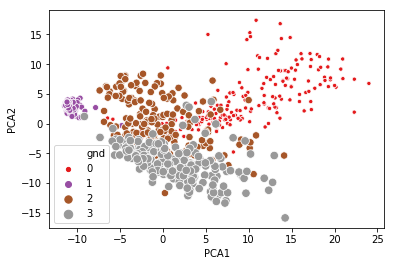

In [42]:
pca_data=pd.DataFrame(pca_data,columns=['PCA1','PCA2'])
sns.scatterplot('PCA1','PCA2',data=pca_data,hue=data['gnd'],size=data['gnd'],palette='Set1')

258 dimensions in the original data is reduced to just 2 and the 4 classes of gnd are plotted 
where we can see the with just 2 dimesions all the 4 classes have been seperated and clearly grouped together.This is because the first 2 PCA components cover the maximum variance and derive a linear trainsformation out of it which results in perfect grouping of different classes.

In [43]:
pca1=PCA(n_components=25)

In [44]:
pca_data1=pca1.fit_transform(scaled_data)

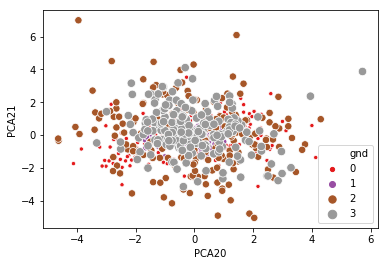

In [45]:
pca_data1=pd.DataFrame(pca_data1,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10',
                                     'PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18','PCA19','PCA20',
                                     'PCA21','PCA22','PCA23','PCA24','PCA25'])
sns.scatterplot('PCA20','PCA21',data=pca_data1,hue=data['gnd'],size=data['gnd'],palette='Set1')

PCA20 and PCA21 are not as clear as PCA1 and PCA2 as we can see that the classes are not clearly 
grouped together and overlapping with each other.The residual variance becomes very less in the subsequent PCA components.

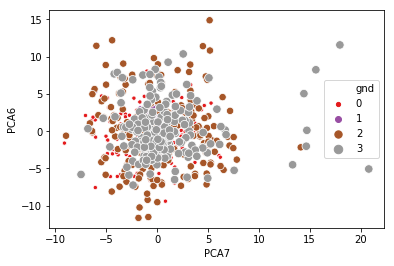

In [46]:
sns.scatterplot('PCA7','PCA6',data=pca_data1,hue=data['gnd'],size=data['gnd'],palette='Set1')

In [47]:
from sklearn.manifold import TSNE

In [48]:
sne=TSNE(n_components=3)

In [49]:
sne_data=sne.fit_transform(scaled_data)

In [50]:
sne_df=pd.DataFrame(sne_data,columns=['SNE1','SNE2','SNE3'])
sne_df

,SNE1,SNE2,SNE3
0,-10.564612,0.938456,13.606697
1,-10.571280,-3.453264,4.155890
2,-7.112767,3.809917,7.799889
3,-9.265800,-2.119762,1.240961
4,-6.643911,-3.031165,1.828606
5,-11.891411,2.247420,5.832707
6,-10.321067,-3.740786,3.004728
7,-9.354082,-2.206097,1.405962
8,-10.585711,6.628323,9.413139
9,-11.938846,-0.791736,4.001000


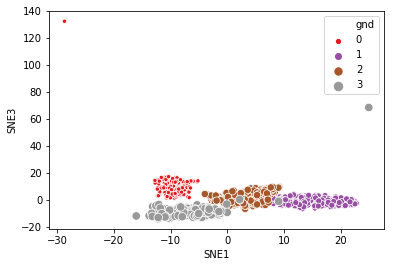

In [55]:
sns.scatterplot('SNE1','SNE3',data=sne_df,hue=data['gnd'],size=data['gnd'],palette='Set1')

Grouping of the 4 classes is more clearly grouped than that of PCA6 and PCA7.Non-linear transformation of t-SNE has a better effect on the dataset.

In [56]:
pca2=PCA(n_components=256)

In [57]:
pca_data2=pca2.fit_transform(scaled_data)

In [58]:
pca_data2=pd.DataFrame(pca_data2)

In [63]:
pca_data2.shape

(800, 256)

In [64]:
scaled_data.shape

(800, 258)

In [65]:
Scaled_data=pd.DataFrame(scaled_data[:,:-2])
Scaled_data.shape

(800, 256)

In [66]:
inv_data=pca2.inverse_transform(Scaled_data)

In [67]:
Inv_data=inv_data[:,:-2]

In [68]:
Inv_data.shape

(800, 256)

In [69]:
Error=pca_data2-Inv_data

In [70]:
New_Df={'PCA_error 2':Error[1],'PCA_error 4':Error[3],
        'PCA_error 10':Error[9],'PCA_error 30':Error[29],'PCA_error 40':Error[39],'PCA_error 256':Error[255]}

In [71]:
New_df=pd.DataFrame(New_Df,columns=['PCA_error 2','PCA_error 4','PCA_error 10',
                                    'PCA_error 30','PCA_error 40','PCA_error 256'])

In [72]:
New_df  #Jus tried to see error by getting the difference between original PCA transformed data and inverse transformed data

,PCA_error 2,PCA_error 4,PCA_error 10,PCA_error 30,PCA_error 40,PCA_error 256
0,5.683583,5.518487,-0.084779,0.108612,1.829524,0.527108
1,-0.374035,-10.297705,-1.911580,-0.386091,-0.800229,0.307897
2,5.357829,-8.802455,2.777834,2.852458,-0.246718,0.867662
3,-1.774084,-7.131384,-2.135289,0.549057,0.822185,0.675191
4,1.326617,-3.456369,-1.678020,-0.606362,3.744865,0.804409
5,2.491792,-6.914080,-2.495471,-0.906910,0.603880,0.440047
6,-1.486366,-12.474246,-1.011473,0.946952,1.608626,0.727092
7,-0.630172,-8.606806,-2.258615,0.555447,0.966869,0.709906
8,1.371449,0.062545,2.312362,2.589447,0.552042,1.059305
9,0.062540,-9.214419,-0.195657,1.163665,0.974700,0.316422


# Remaining continued in Assignment_8(2)